# <p style="text-align: center;"> Heart Failure Prediction Data Wrangling</p>

## 1.0 Imports

In [1]:
# Import needed packages for the project 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os


### 1.1 Load The Heart Failure Prediction Dataset 

In [2]:
# The supplied CSV data file is the raw_data directory
# Let's create a Dataframe 

heart_df = pd.read_csv('../HeartFailurePrediction/data/heart.csv')

first step is auditing the data using the info method and displaying the first few records with head.

In [3]:
# Info method 

heart_df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [4]:
# Call the head method on 'heart_df' to see the first 5 rows of data

heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]



In [5]:
# Check the shape of the 'heart_df'

heart_df.shape

(918, 12)

In [6]:
# Print the tail of df
print(heart_df.tail())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  


In [7]:
# Checking the 'heart_df' description
# Using Transpose method that will give the table a nicer output

heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
# Checking the data types of the columns 

heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
# let's see the average age that is in the 'heart_df' set.

age_means = heart_df.groupby(by='Sex')[['Age', 'RestingBP']].mean()
age_means.head()

,Age,RestingBP
Sex,,
F,52.492228,132.212435
M,53.782069,132.445517


The average age for Men's are ~54 and Feamle's average age ~53 with both Resting Blood Preasure of ~132. 

# 2.0 Investigating The Data

### 2.1 Number Of Missing Values By Column

In [10]:
# Check to see if there is missing values

# Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
# heart_df as well as the percentages (using `.mean()` instead of `.sum()`).
# Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([heart_df.isnull().sum(), 100 * heart_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing

,count,%
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


It's confirmed! There is no missing values. 

In [11]:
# Filtering your data by Male(M) Sex for the columns of Sex, Age, MaxHR, Cholesterol, and RestingECG. 

heart_df.loc[heart_df.Sex == 'M', ['Sex', 'Age','MaxHR', 'Cholesterol', 'RestingECG']]

,Sex,Age,MaxHR,Cholesterol,RestingECG
0,M,40,172,289,Normal
2,M,37,98,283,ST
4,M,54,122,195,Normal
5,M,39,170,339,Normal
7,M,54,142,208,Normal
...,...,...,...,...,...
911,M,59,90,176,LVH
913,M,45,132,264,Normal
914,M,68,141,193,Normal
915,M,57,115,131,Normal


In [12]:
# Filtering 'heart_df' by Male(M) Sex for the columns of Sex, Age, MaxHR, Cholesterol, and RestingECG. 

heart_df.loc[heart_df.Sex == 'F', ['Sex', 'Age','MaxHR', 'Cholesterol', 'RestingECG']]

,Sex,Age,MaxHR,Cholesterol,RestingECG
1,F,49,156,180,Normal
3,F,48,108,214,Normal
6,F,45,170,237,Normal
9,F,48,120,284,Normal
10,F,37,142,211,Normal
...,...,...,...,...,...
901,F,58,146,225,LVH
906,F,55,166,342,Normal
909,F,63,136,197,Normal
912,F,57,123,241,Normal


In [13]:
# Use heart_df's `select_dtypes` method to select columns of dtype 'object'
heart_df.select_dtypes(object)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


### 2.2 Unique Sex Types

In this data documentation, it is mentioned there is two Sex types. That is Male (M) and Female (F). So, check the unique value in the column to make sure there is only M and F.

In [14]:
# Use pandas' Series method `value_counts` to find if there is more than two sex types 
heart_df['Sex'].value_counts().head()

Sex
M    725
F    193
Name: count, dtype: int64

In [15]:
# Select the 'Sex' columns from heart_df and use the `nunique` method to calculate
# the number of unique values in each

heart_df['Sex'].nunique()

2

It's confirmed there is only two Sex Types in this column. There are 725 Male and 193 Feamle.

### Catgorize Resting Blood Preasure (RestingBP) into 4 Catagories. 

#### These 4 catagories are Normal, Elevated, High Blood Preasure Stage 1, and High Blood Preasure Stage 2. 

In [16]:
# define a fucntion that will check the heart_df column RestingBP 
def categorize_bp(RestingBP):
    if RestingBP < 120:
        return 'Normal'
    elif RestingBP < 130:
        return 'Elevated'
    elif RestingBP < 140:
        return 'High BP Stage 1'
    else:
        return 'High BP Stage 2'

# Store those catgirzed data into new Column called RestingBP_Category
heart_df['RestingBP_Category'] = heart_df['RestingBP'].apply(categorize_bp)


In [17]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Category
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,High BP Stage 2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,High BP Stage 2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,High BP Stage 1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,High BP Stage 1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,High BP Stage 2


Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interested in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

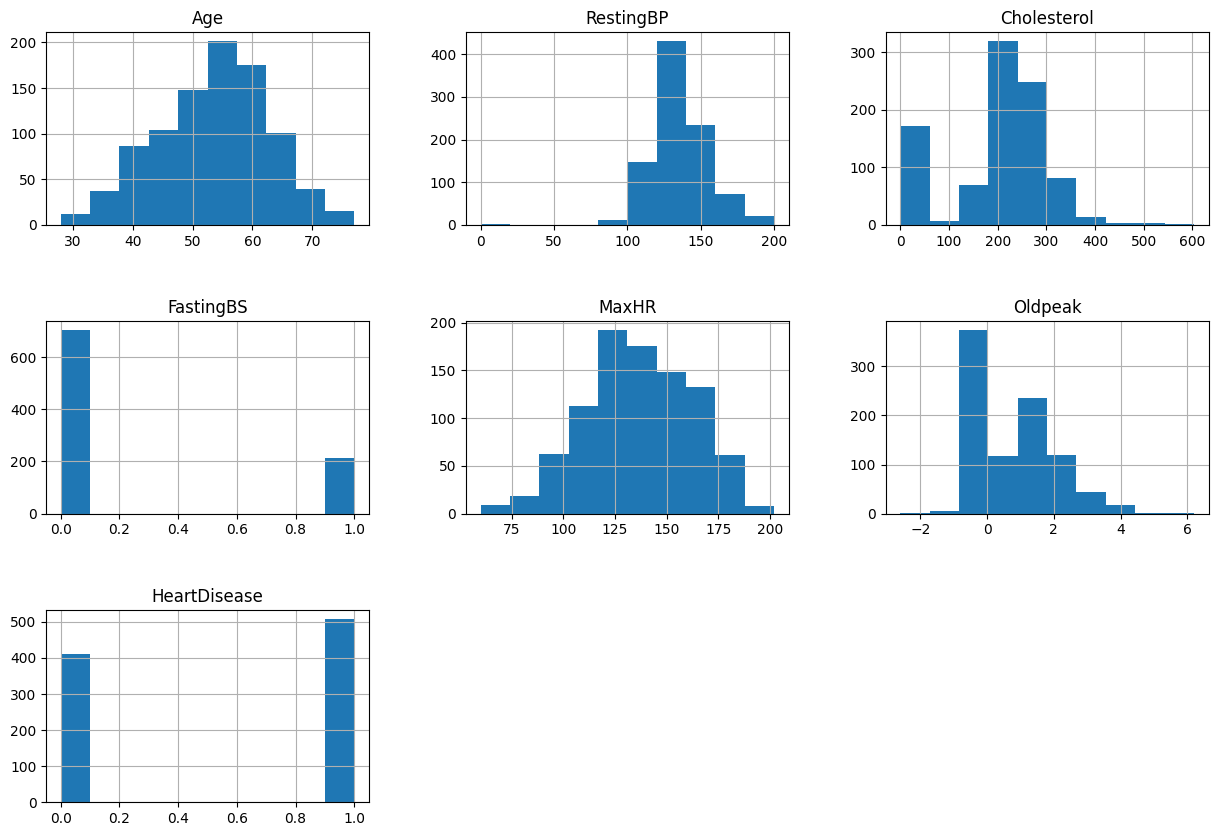

In [18]:
# Plote a histogram of each column to see if there is any outliers 
heart_df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

#### It doesn't look like there are any outliers or anomalys in these columns. 

In [19]:
heart_df.shape

(918, 13)

There is a new column that was created to our column count has inceased by one. 

#### Save the data into new data so original data doesn't get overwritten. 

In [21]:
# save the data to a new csv file
heart_df.to_csv('ModifiedHeartData.csv', index=False)